In [551]:
import numpy as np
import matplotlib.pyplot as plt
import galois
from classical_code import *
from quantum_code import *
import os

In [649]:
GF = galois.GF(2)
# ccode = read_code("../codes/ccodes/24_18_3_4.code")
ccode = read_code("../codes/ccodes/8_6_3_4.code")

H = np.zeros((ccode.m, ccode.n), dtype=int)
for i in range(ccode.m):
    for j in range(ccode.n):
        if (j in ccode.check_nbhd[i]):
            H[i][j] = 1


# H = np.array([
#     [1,0,1,0,1,0],
#     [0,1,0,0,1,1],
#     [1,0,1,1,0,0],
#     [0,1,1,1,0,0]
# ])
m, n = H.shape
H = GF(H)
print(H)


[[0 0 1 0 1 1 0 1]
 [1 1 0 0 1 0 0 1]
 [1 0 1 0 0 1 1 0]
 [1 0 0 1 1 0 1 0]
 [0 1 0 1 0 1 1 0]
 [0 1 1 1 0 0 0 1]]


In [650]:
def gaussian_reduction(H):
    m, n = H.shape

    H = GF(H)
    Hhat = GF(H.copy())
    K = GF(np.eye(n, dtype=int))
    pik = set(np.arange(n))

    for j in range(n):
        i = 0
        while ((i < m-1) and (Hhat[i][j] != 1)):
            i += 1
        if Hhat[i][j] == 1:
            pik ^= {j}
            for l in range(j+1, n):
                if Hhat[i][l] == 1:
                    Hhat[:,l] = Hhat[:,j] ^ Hhat[:,l]
                    K[:,l] = K[:,j] ^ K[:,l]

    return K, pik

In [651]:
Lx = []
Lz = []

K, pik = gaussian_reduction(H)
I = np.eye(n, dtype=int)

for i in pik:
    for j in pik:
        tmp = np.kron(K[:,i], I[:,j])
        Lz.append(np.concatenate([tmp, np.zeros(m**2, dtype=int)]))

        tmp = np.kron(I[:,i], K[:,j])
        Lx.append(np.concatenate([tmp, np.zeros(m**2, dtype=int)]))

K, pik = gaussian_reduction(H.T)
I = np.eye(H.T.shape[1], dtype=int)

for i in pik:
    for j in pik:
        tmp = np.kron(K[:,i], I[:,j])
        Lx.append(np.concatenate([np.zeros(n**2, dtype=int), tmp]))

        tmp = np.kron(I[:,i], K[:,j])
        Lz.append(np.concatenate([np.zeros(n**2, dtype=int), tmp]))

Lx = np.array(Lx)
Lz = np.array(Lz)

In [655]:
H = np.array(H)
Hx = np.hstack([np.kron(H, np.eye(H.shape[1], dtype=int)), np.kron(np.eye(H.shape[0], dtype=int), H.T)])
Hz = np.hstack([np.kron(np.eye(H.shape[1], dtype=int), H), np.kron(H.T, np.eye(H.shape[0], dtype=int))])
cm, cn = Hx.shape

Hx_inds = [np.where(Hx[i])[0] for i in range(Hx.shape[0])]
Hz_inds = [np.where(Hz[i])[0] for i in range(Hz.shape[0])]

xL_inds = [np.where(x)[0] for x in Lx]
zL_inds = [np.where(z)[0] for z in Lz]
k = len(xL_inds)

qcode = QuantumCode(cn, k, Hz.shape[0], Hz.shape[0],
                    0, 0,
                    Hx_inds, Hz_inds, xL_inds, zL_inds, [])
# write_qcode("../codes/qcodes/" + f"/HGP_{cn}_{k}.qcode", qcode)


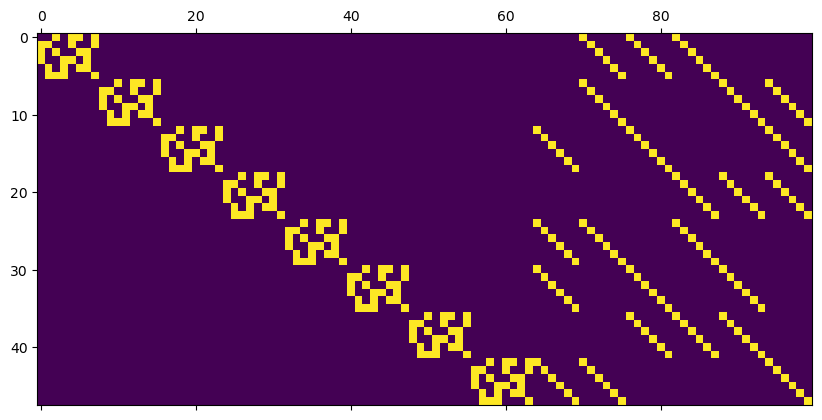

In [656]:
plt.matshow(np.array(Hz))

In [657]:
np.count_nonzero(Hx, axis=1)

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7], dtype=int64)

In [658]:
xgens = []
zgens = []

for i in range(Hx.shape[0]):
    xgens.append((Hx[i][:n**2].reshape(n,n), Hx[i][n**2:].reshape(m,m)))
    zgens.append((Hz[i][:n**2].reshape(n,n), Hz[i][n**2:].reshape(m,m)))

xlogs = []
zlogs = []
for i in range(Lx.shape[0]):
    xlogs.append((Lx[i][:n**2].reshape(n,n), Lx[i][n**2:].reshape(m,m)))
    zlogs.append((Lz[i][:n**2].reshape(n,n), Lz[i][n**2:].reshape(m,m)))

In [659]:
H.T

array([[0, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [1, 1, 0, 0, 0, 1]], dtype=uint8)

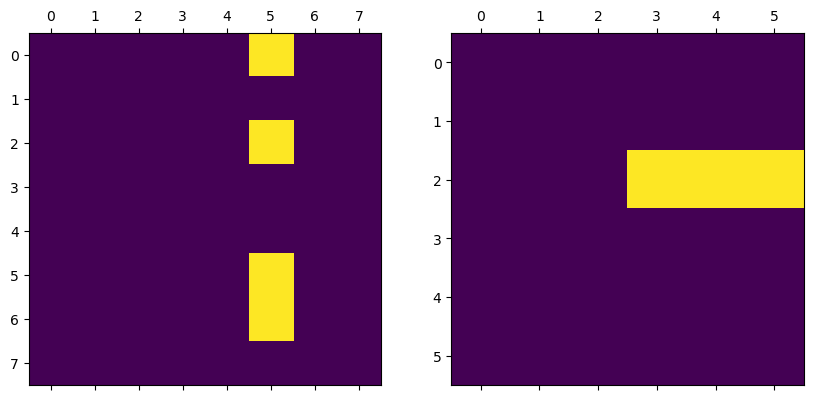

In [660]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

axes[0].matshow(xgens[21][0])
axes[1].matshow(xgens[19][1])

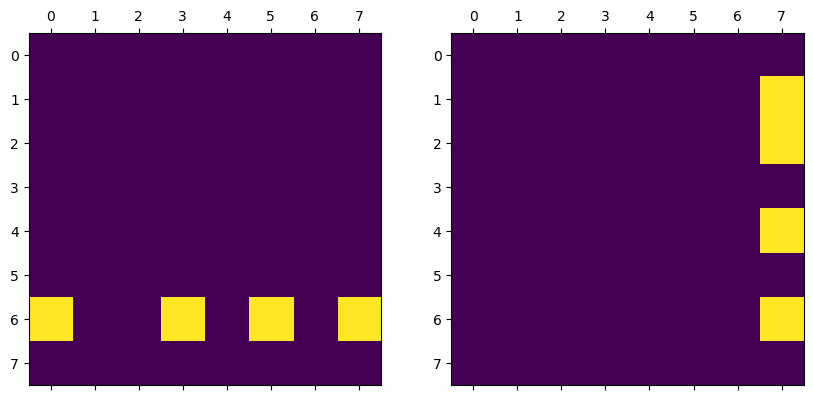

In [661]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

ind = 1
axes[0].matshow(xlogs[ind][0])
axes[1].matshow(zlogs[ind][0])

In [662]:
inds = np.arange(Hx.shape[1])
left, right = (inds[:n**2].reshape(n,n), inds[n**2:].reshape(m,m))
print(left)
print(right)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
[[64 65 66 67 68 69]
 [70 71 72 73 74 75]
 [76 77 78 79 80 81]
 [82 83 84 85 86 87]
 [88 89 90 91 92 93]
 [94 95 96 97 98 99]]


In [663]:
def assign_qubits(left, right):
    pairs = np.concatenate([np.diagonal(left), np.diagonal(right)]).reshape(-1, 2)

    upper_triangle_inds = np.triu_indices(left.shape[0], k=1)
    for i, j in zip(*upper_triangle_inds):
        tmp = np.array([left[i][j], left[j][i]])
        pairs = np.vstack([pairs, tmp])

    upper_triangle_inds = np.triu_indices(right.shape[0], k=1)
    for i, j in zip(*upper_triangle_inds):
        tmp = np.array([right[i][j], right[j][i]])
        pairs = np.vstack([pairs, tmp])

    return pairs

pairs = assign_qubits(left, right)
pairs

array([[ 0,  9],
       [18, 27],
       [36, 45],
       [54, 63],
       [64, 71],
       [78, 85],
       [92, 99],
       [ 1,  8],
       [ 2, 16],
       [ 3, 24],
       [ 4, 32],
       [ 5, 40],
       [ 6, 48],
       [ 7, 56],
       [10, 17],
       [11, 25],
       [12, 33],
       [13, 41],
       [14, 49],
       [15, 57],
       [19, 26],
       [20, 34],
       [21, 42],
       [22, 50],
       [23, 58],
       [28, 35],
       [29, 43],
       [30, 51],
       [31, 59],
       [37, 44],
       [38, 52],
       [39, 60],
       [46, 53],
       [47, 61],
       [55, 62],
       [65, 70],
       [66, 76],
       [67, 82],
       [68, 88],
       [69, 94],
       [72, 77],
       [73, 83],
       [74, 89],
       [75, 95],
       [79, 84],
       [80, 90],
       [81, 96],
       [86, 91],
       [87, 97],
       [93, 98]])

In [664]:
def iceberglogicals(n):
    icebergX = np.zeros(shape=(n-2,2), dtype=int)
    icebergZ = np.zeros(shape=(n-2,2), dtype=int)

    for i in range(n-2):
        icebergX[i] = np.array([0,i+1])
        icebergZ[i] = np.array([i+1,n-1])

    return icebergX, icebergZ

iceberg642Xlogicals = np.array([
    [1,2],
    [0,1],
    [4,5],
    [3,4],
])

iceberg642Zlogicals = np.array([
    [0,1],
    [1,2],
    [3,4],
    [4,5]
])

ibn = 4
ibk = ibn-2
icebergX = np.ones(ibn, dtype=int)
# icebergZ = np.ones(ibn, dtype=int)

# if (ibn == 6):
#     icebergXlogicals, icebergZlogicals = iceberg642Xlogicals, iceberg642Zlogicals
# else:
icebergXlogicals, icebergZlogicals = iceberglogicals(ibn)
print(icebergXlogicals)
print(icebergZlogicals)

[[0 1]
 [0 2]]
[[1 3]
 [2 3]]


In [665]:
# Hx, Hz, Lx, Lz = qcode.to_numpy()
concatenatedStabilizersQED = np.kron(np.eye(Hx.shape[1]//ibk, dtype=int), icebergX) # ibk | Hx.shape[1] required

concatenatedStabilizersXQEC = np.zeros(shape=(Hx.shape[0], concatenatedStabilizersQED.shape[1]), dtype=int)
concatenatedStabilizersZQEC = np.zeros(shape=(Hz.shape[0], concatenatedStabilizersQED.shape[1]), dtype=int)

for i, r in enumerate(Hx):
    # print(np.where(r))
    for x in np.where(r)[0]:
        iceberg_block = np.where(pairs == x)[0][0]
        iceberg_log = np.where(pairs == x)[1][0]
        # print(iceberg_block, iceberg_log)
        concatenatedStabilizersXQEC[i][icebergXlogicals[iceberg_log]+(ibn*iceberg_block)] ^= 1

for i, r in enumerate(Hz):
    for z in np.where(r)[0]:
        iceberg_block = np.where(pairs == z)[0][0]
        iceberg_log = np.where(pairs == z)[1][0]
        concatenatedStabilizersZQEC[i][icebergZlogicals[iceberg_log]+(ibn*iceberg_block)] ^= 1

concatenatedHx = np.vstack([concatenatedStabilizersXQEC, concatenatedStabilizersQED][::-1])
concatenatedHz = np.vstack([concatenatedStabilizersZQEC, concatenatedStabilizersQED][::-1])

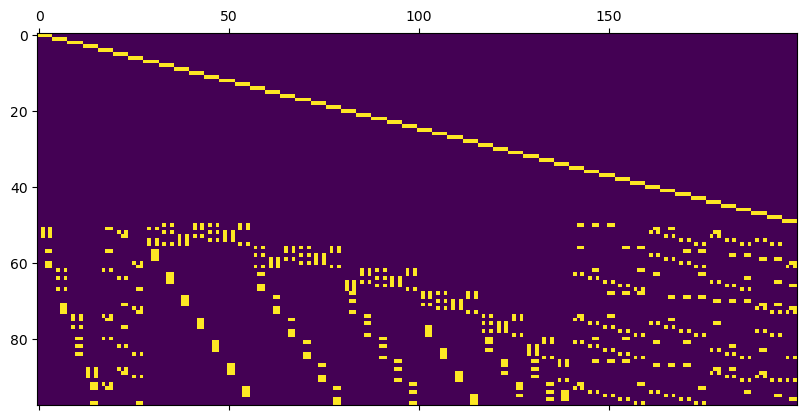

In [666]:
plt.matshow(concatenatedHz)

In [667]:
for g in concatenatedHz:
    print(np.where(g)[0])

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]
[16 17 18 19]
[20 21 22 23]
[24 25 26 27]
[28 29 30 31]
[32 33 34 35]
[36 37 38 39]
[40 41 42 43]
[44 45 46 47]
[48 49 50 51]
[52 53 54 55]
[56 57 58 59]
[60 61 62 63]
[64 65 66 67]
[68 69 70 71]
[72 73 74 75]
[76 77 78 79]
[80 81 82 83]
[84 85 86 87]
[88 89 90 91]
[92 93 94 95]
[96 97 98 99]
[100 101 102 103]
[104 105 106 107]
[108 109 110 111]
[112 113 114 115]
[116 117 118 119]
[120 121 122 123]
[124 125 126 127]
[128 129 130 131]
[132 133 134 135]
[136 137 138 139]
[140 141 142 143]
[144 145 146 147]
[148 149 150 151]
[152 153 154 155]
[156 157 158 159]
[160 161 162 163]
[164 165 166 167]
[168 169 170 171]
[172 173 174 175]
[176 177 178 179]
[180 181 182 183]
[184 185 186 187]
[188 189 190 191]
[192 193 194 195]
[196 197 198 199]
[ 33  35  41  43  45  47  53  55 142 143 146 147 150 151]
[  1   3  18  19  29  31  41  43  53  55 162 163 166 167]
[  1   3  21  23  33  35  45  47  49  51 161 163 178 179]
[  1   3  22  23  37  39  41  43  

In [ ]:
concatenatedxL = np.zeros(shape=(Lx.shape[0], concatenatedStabilizersQED.shape[1]), dtype=int)
concatenatedzL = np.zeros(shape=(Lz.shape[0], concatenatedStabilizersQED.shape[1]), dtype=int)

for i, r in enumerate(Lx):
    for x in np.where(r)[0]:
        iceberg_block = np.where(pairs == x)[0][0]
        iceberg_log = np.where(pairs == x)[1][0]
        # print(iceberg_block, iceberg_log)
        concatenatedxL[i][icebergXlogicals[iceberg_log]+(ibn*iceberg_block)] ^= 1

for i, r in enumerate(Lz):
    for z in np.where(r)[0]:
        iceberg_block = np.where(pairs == z)[0][0]
        iceberg_log = np.where(pairs == z)[1][0]
        concatenatedzL[i][icebergZlogicals[iceberg_log]+(ibn*iceberg_block)] ^= 1

xL_inds = [np.where(x)[0] for x in concatenatedxL]
zL_inds = [np.where(z)[0] for z in concatenatedzL]

m, n = concatenatedHx.shape
k = len(xL_inds)

Hx_inds = [np.where(concatenatedHx[i])[0] for i in range(concatenatedHx.shape[0])]
Hz_inds = [np.where(concatenatedHz[i])[0] for i in range(concatenatedHz.shape[0])]

qcode = QuantumCode(n, k, concatenatedHx.shape[0], concatenatedHz.shape[0],
                    concatenatedStabilizersQED.shape[0], concatenatedStabilizersQED.shape[0],
                    Hx_inds, Hz_inds, xL_inds, zL_inds, list(pairs))
# write_qcode("../codes/qcodes/" + f"/HGP_C{ibn}{ibk}2_{n}_{k}.qcode", qcode)

In [568]:
zL_inds

[array([ 22,  23,  97,  99, 205, 207, 253, 255, 297, 299, 337, 339, 373,
        375, 405, 407, 433, 435, 477, 479], dtype=int64),
 array([101, 103, 209, 211, 257, 259, 301, 303, 341, 343, 377, 379, 409,
        411, 437, 439, 481, 483, 497, 499], dtype=int64),
 array([109, 111, 217, 219, 265, 267, 309, 311, 349, 351, 385, 387, 417,
        419, 445, 447, 489, 491, 505, 507], dtype=int64),
 array([113, 115, 221, 223, 269, 271, 313, 315, 353, 355, 389, 391, 421,
        423, 449, 451, 493, 495, 509, 511], dtype=int64),
 array([153, 155, 337, 339, 373, 375, 405, 407, 457, 459, 498, 499],
       dtype=int64),
 array([ 25,  27, 157, 159, 341, 343, 377, 379, 409, 411, 461, 463],
       dtype=int64),
 array([165, 167, 349, 351, 385, 387, 417, 419, 469, 471, 517, 519],
       dtype=int64),
 array([169, 171, 353, 355, 389, 391, 421, 423, 473, 475, 521, 523],
       dtype=int64),
 array([ 97,  99, 297, 299, 373, 375, 405, 407, 433, 435, 506, 507],
       dtype=int64),
 array([101, 103, 301, 303

In [569]:
xL_inds

[array([ 20,  22,  96,  98, 204, 206, 252, 254, 296, 298, 336, 338, 372,
        374, 404, 406, 432, 434, 476, 478], dtype=int64),
 array([152, 154, 336, 338, 372, 374, 404, 406, 456, 458, 496, 497],
       dtype=int64),
 array([ 96,  98, 296, 298, 372, 374, 404, 406, 432, 434, 504, 505],
       dtype=int64),
 array([ 96,  98, 296, 298, 336, 338, 432, 434, 500, 501, 508, 509],
       dtype=int64),
 array([100, 102, 208, 210, 256, 258, 300, 302, 340, 342, 376, 378, 408,
        410, 436, 438, 480, 482, 496, 498], dtype=int64),
 array([ 24,  25, 156, 158, 340, 342, 376, 378, 408, 410, 460, 462],
       dtype=int64),
 array([100, 102, 300, 302, 376, 378, 408, 410, 436, 438, 516, 517],
       dtype=int64),
 array([100, 102, 300, 302, 340, 342, 436, 438, 512, 513, 520, 521],
       dtype=int64),
 array([108, 110, 216, 218, 264, 266, 308, 310, 348, 350, 384, 386, 416,
        418, 444, 446, 488, 490, 504, 506], dtype=int64),
 array([164, 166, 348, 350, 384, 386, 416, 418, 468, 470, 516, 518]